# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [68]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, BatchNormalization

from keras.losses import categorical_crossentropy

from keras.optimizers import Adam

from keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [69]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [70]:
import h5py

# Open the file as read only

h5f = h5py.File('/content/drive/MyDrive/Python for datascience/deep_learning_project/SVHN_single_grey1.h5', 'r')

In [71]:
# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

Check the number of images in the training and the testing dataset.

In [72]:
#X is the 2D array of images, The classes are in Y
len(X_train), len(X_test)


(42000, 18000)

**Observation:**
There are 42000 images in the training data and 18000 images in the test data

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

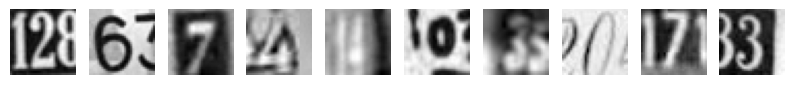

The Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [73]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    #Since the gray colormap is used, the array is a 2D-array that represents a grayscale image.
    #Every pixel is only described by one value (usually between 0 and 255) that indicates its color on a scale from black (0) to white (255).
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('The Label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [74]:
# Shape of the images and the first image

print("Shape of the first image :", X_train[0].shape)
print()
print("First image as an array:\n", X_train[0])

Shape of the first image : (32, 32)

First image as an array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [75]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_train.shape

(42000, 1024)

### **Normalize the train and the test data**

In [76]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255
X_train.shape


(42000, 1024)

Print the shapes of Training and Test data

In [77]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [78]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
We observe that each entry of y_test is a one-hot encoded vector instead of a single label.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [79]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [80]:
#Importing losses and optimizers modules
from keras import losses
from keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence

    #First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
    model.add(Dense(64, activation='relu', input_shape=(1024, )))

    #Second hidden layer with 32 nodes and the relu activation
    model.add(Dense(32, activation='relu'))

    #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    model.add(Dense(10, activation='softmax'))

    #Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [81]:
#Call the nn_model_1 function and store the model in a new variable.
model_1 = nn_model_1()

#Print the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Fit the model
#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20.
history_model_1 = model_1.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    verbose=1,
                    epochs=20)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3593 - accuracy: 0.5566 - val_loss: 1.3259 - val_accuracy: 0.5749
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2905 - accuracy: 0.5834 - val_loss: 1.2542 - val_accuracy: 0.6012
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

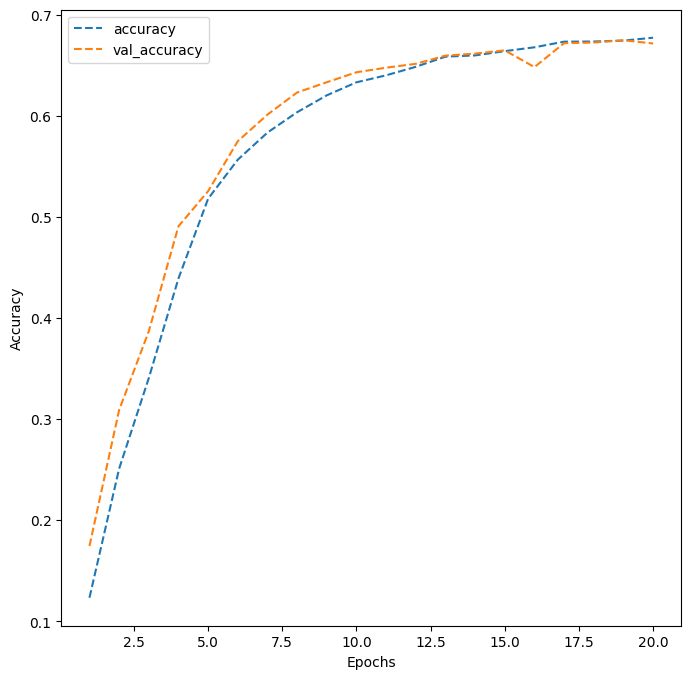

In [83]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [84]:
accuracy = model_1.evaluate(X_test, y_test, verbose=2)

563/563 - 1s - loss: 1.0474 - accuracy: 0.6784 - 1s/epoch - 2ms/step


**Observations:_______**

    1. We observe that the model is giving around ~68% accuracy at 20 echos. At 20 epochs, the accuracy of the model on the training data is about 68% and the validation accuracy is ~68%.
    2. The Accuracy of both training and validation is almost symetric. This is a good indicator that the model is not overfitting the training dataset.
    3. The Accuracy starts to increase steadily until epoch 6, then it increases in a lower rate until epoch 17 where we observe minimum increase afterward.
    4. We can see that the accuracy of validation dataset is slightly higher than the training dataset until epoch 10, where they start replacing places. This could give a sign that the model starts to fit the training dataset better, but not to the point of overfitting yet.
    5. Overall, the model is not overfit and is giving accuracy of 0.68 on training dataset and roughly the same on validation dataset.



Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [85]:
#Clearing backend
from keras import backend
backend.clear_session()


In [86]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [87]:
#Importing losses and optimizers modules
from keras import losses
from keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    #First hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
    model.add(Dense(256, activation='relu', input_shape=(1024, )))

    #Second hidden layer with 128 nodes and the relu activation
    model.add(Dense(128, activation='relu'))

    #Add the Dropout layer with the rate equal to 0.2
    model.add(Dropout(0.2))

    #Third hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu'))

    #Fourth hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu'))

    #Fifth hidden layer with 32 nodes and the relu activation
    model.add(Dense(32, activation='relu'))

    #Add the BatchNormalization layer
    model.add(BatchNormalization())

    #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    model.add(Dense(10, activation='softmax'))

    #Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'.
    adam = optimizers.Adam(learning_rate = 0.0005)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model


In [88]:
# Call the nn_model_2 function and store the model in a new variable.
model_2 = nn_model_2()

In [89]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [90]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
history_model_2 =  model_2.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    verbose=1,
                    epochs=30)

Epoch 1/30
263/263 [==============================] - 5s 9ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 2s 7ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1500 - accuracy: 0.1854 - val_loss: 2.0578 - val_accuracy: 0.2615
Epoch 4/30
263/263 [==============================] - 2s 6ms/step - loss: 1.6140 - accuracy: 0.4423 - val_loss: 1.4145 - val_accuracy: 0.5477
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 1.3388 - accuracy: 0.5515 - val_loss: 1.2189 - val_accuracy: 0.6020
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.2249 - accuracy: 0.5978 - val_loss: 1.1197 - val_accuracy: 0.6373
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1373 - accuracy: 0.6334 - val_loss: 1.0606 - val_accuracy: 0.6589
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

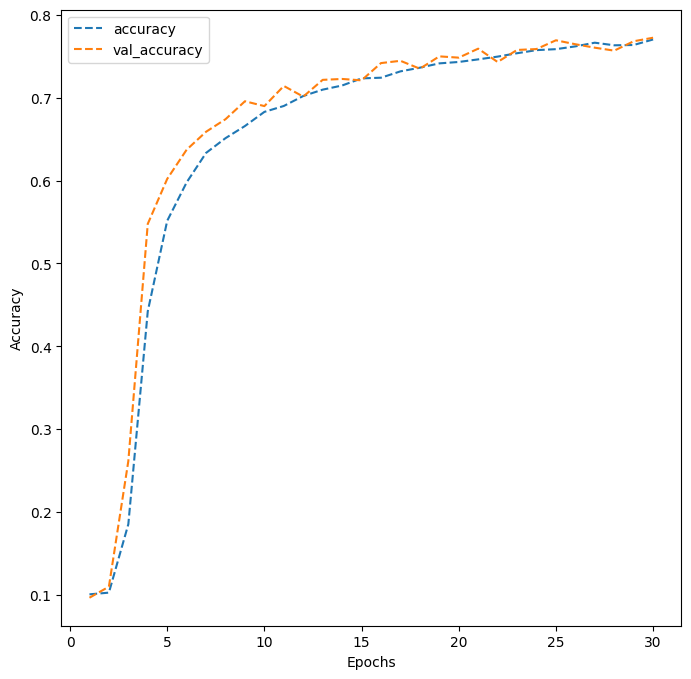

In [91]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [92]:
accuracy = model_2.evaluate(X_test, y_test, verbose=2)

563/563 - 2s - loss: 0.7372 - accuracy: 0.7704 - 2s/epoch - 3ms/step


**Observations:_______**

    1. The overall accuracy of this model is better than the 1st model.
    2. The Training accuracy is increasing with the increase in epochs. It has a steep increase up to around 8 epochs and then mostly constant.
    3. After epoch 7 we can see small ups and downs in the validation dataset accuracy. This is not a concern as the overall trend is positive.
    3. The validation accuracy is bit fluctuating but overall it is also increasing with the increase in epochs. Same as training accuracy, validation accuracy also has a rapid increase up to around 8 epochs and then has lower increase.
    4. The model is giving around ~77% accuracy at 30 epochs. At 30 epochs, the accuracy of the model on the training data is about 77% and the validation accuracy is 76%.
    5. The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [93]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)


563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [94]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1814
           1       0.79      0.80      0.79      1828
           2       0.85      0.75      0.80      1803
           3       0.70      0.75      0.72      1719
           4       0.79      0.84      0.81      1812
           5       0.72      0.76      0.74      1768
           6       0.72      0.78      0.75      1832
           7       0.82      0.82      0.82      1808
           8       0.68      0.73      0.70      1812
           9       0.79      0.73      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



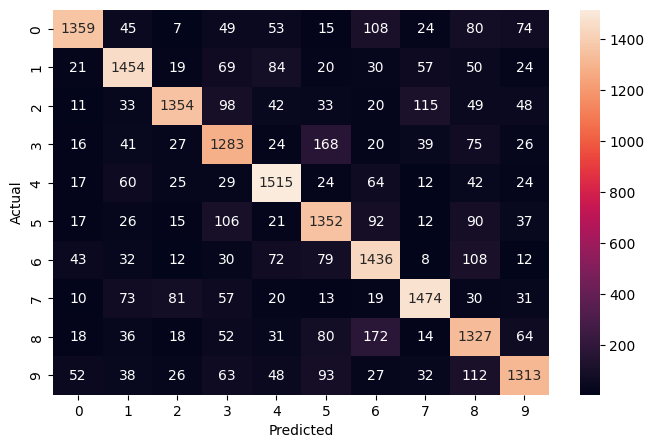

In [95]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:__________**

    1. The classification report tells us that numbers 0 and 4 have the highest f1-score (0.81) meaning they have the best chances of being accurately recognized. Whereas, numbers 8 has the lowest f1-score of (0.70).
    2. Number 3 has the lowest precision and 0 has the highest, this means that the model is classifing other numbers as 3 which not valid. Whereas 0 has the lowest chances of being false positive.
    3. Number 4 has the highest recall, whereas 5 and 6 have the lowest. It indicates that the model is struggling to identify all 5's and 6's as what they are. All the 4's that have been identified are 82% correct as it has a recall of 0.82.
    4. The confusion matrix shows that the model confused 5 with 3 and 6 with 8. This adds up to the above obervations about 3, 5 and 6. which assures that there are some prediction issues in general.






## **Using Convolutional Neural Networks**

In [128]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Load the dataset again and split the data into the train and the test dataset.**

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical

In [130]:
import h5py

# Open the file as read only

h5f = h5py.File('/content/drive/MyDrive/Python for datascience/deep_learning_project/SVHN_single_grey1.h5', 'r')

In [131]:
# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Check the number of images in the training and the testing dataset.

In [132]:
len(X_train), len(X_test)


(42000, 18000)

**Observation:**
There are 42,000 images in the training data and 18,000 images in the testing data.



    Use X_train to visualize the first 10 images.
    Use Y_train to print the first 10 labels.


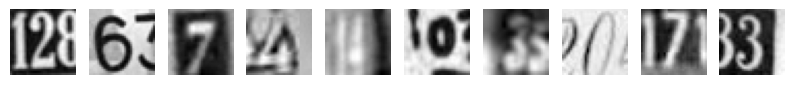

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [133]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [134]:
# Shape of the images and the first image

print("Shape of first image:", X_train[0].shape)
print()
print("First image as an array:\n", X_train[0])

Shape of first image: (32, 32)

First image as an array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [135]:
# We always have to give a 4D array as input to CNNs
# Input data has a shape of (batch_size, height, width, depth), where the first dimension represents the batch size of the image
# and the other three dimensions represent dimensions of the image which are height, width, and depth.
# the greyscale image would have a depth of 1.
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)


Normalize inputs from 0-255 to 0-1

In [136]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [137]:
# New shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [138]:
# Write the function and appropriate variable name to one-hot encode the output

y_train_encoded = to_categorical(y_train)

y_test_encoded = to_categorical(y_test)

# Test labels

y_test_encoded


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
We notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [139]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [140]:
#Importing losses and optimizers modules
from keras import losses
from keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    #First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
    #Conv2D is generally used on Image data. It is called 2 dimensional CNN because the kernel slides along 2 dimensions on the data.
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))

    #Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))

    #Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    #Flatten the output from the previous layer.
    #Input data to the dense layer is 2D array, whereas output of convolutional layer is 4D array, therefore we need to flatten output of conv layer.
    model.add(Flatten())

    #Add a dense layer with 32 nodes. We usually add the Dense layers at the top of the Convolution layer to classify the images.
    model.add(Dense(32))

    #Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #Compile the model with the loss equal to categorical_crossentropy,
    #optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )

    return model

In [141]:
#Build the model
model_1 = cnn_model_1()

#Print the model summary
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [142]:
# Fit the model
history_model_1 = model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 8s 6ms/step - loss: 1.1224 - accuracy: 0.6322 - val_loss: 0.6542 - val_accuracy: 0.8125
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5378 - accuracy: 0.8471 - val_loss: 0.5289 - val_accuracy: 0.8445
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4435 - accuracy: 0.8682 - val_loss: 0.5094 - val_accuracy: 0.8535
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3776 - accuracy: 0.8885 - val_loss: 0.4437 - val_accuracy: 0.8736
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3308 - accuracy: 0.9006 - val_loss: 0.4680 - val_accuracy: 0.8711
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2928 - accuracy: 0.9132 - val_loss: 0.4686 - val_accuracy: 0.8693
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2602 - accuracy: 0.9232 - val_loss: 0.4494 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

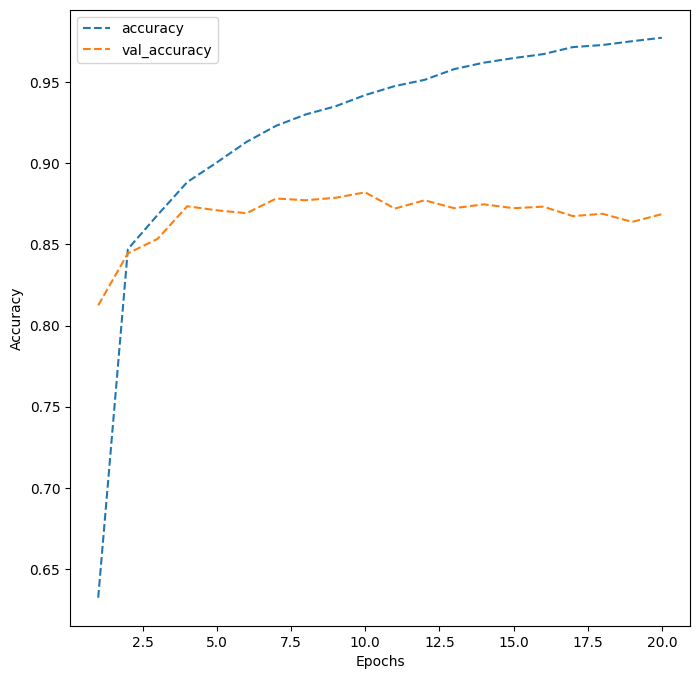

In [144]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


**Observations:__________**

    1. We can see from the above plot that the model has done poorly on the validation data.The validation set accuracy remains more or less the same after 2.5 epochs.
    2. Only after around 5 epochs, the accuracy of the training set begins increasing.
    3. The model has overfit because the validation set accuracy is much lower than the training set accuracy.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [145]:
#Clearing backend
from keras import backend
backend.clear_session()

In [146]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)



### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [147]:
#Define the function
def cnn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    #First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))

    #Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))

    #Add LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    #Add a BatchNormalization layer
    model.add(BatchNormalization())

    #Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))

    #Add LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))

    #Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

    #Add a BatchNormalization layer
    model.add(BatchNormalization())

    #Flatten the output from the previous layer
    model.add(Flatten())

    #Add a dense layer with 32 nodes
    model.add(Dense(32))

    #Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))

    #Add a dropout layer with the rate equal to 0.5
    model.add(Dropout(0.5))

    #Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [148]:
# Build the model
model_2 = cnn_model_2()

#Print the summary
model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [149]:
# Fit the model
history_model_2 = model_2.fit(
            X_train, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size = 128,
            verbose=1)


Epoch 1/30
263/263 [==============================] - 6s 13ms/step - loss: 1.3341 - accuracy: 0.5439 - val_loss: 1.9302 - val_accuracy: 0.2733
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6600 - accuracy: 0.7972 - val_loss: 0.6134 - val_accuracy: 0.8354
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5431 - accuracy: 0.8315 - val_loss: 0.4484 - val_accuracy: 0.8723
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4841 - accuracy: 0.8528 - val_loss: 0.3816 - val_accuracy: 0.8890
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4337 - accuracy: 0.8636 - val_loss: 0.4260 - val_accuracy: 0.8818
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4032 - accuracy: 0.8753 - val_loss: 0.3994 - val_accuracy: 0.8943
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3772 - accuracy: 0.8826 - val_loss: 0.3992 - val_accuracy: 0.8886


### **Plot the Training and Validation accuracies and write your observations.**

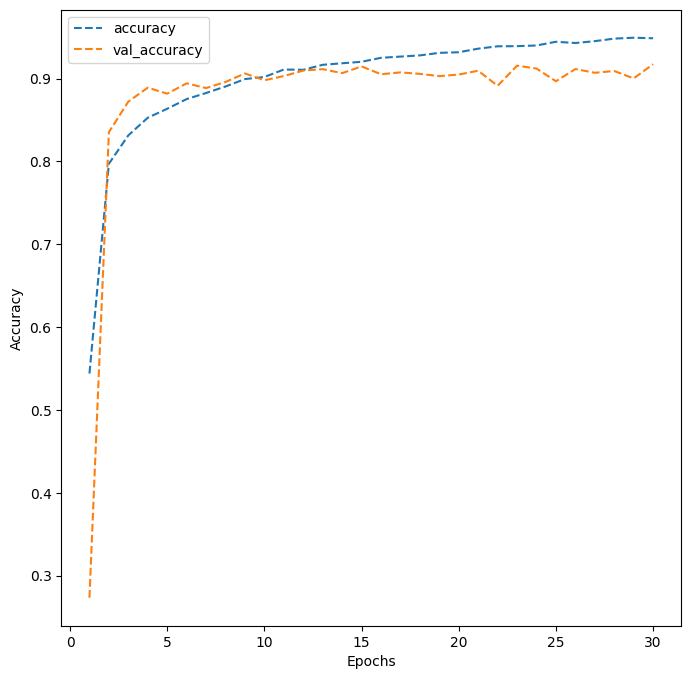

In [150]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


**Observations:________**

    1. The overall accuracy of this model is better than the 1st model.The Training accuracy is increasing with the increase in epochs. It has a rapid increase up to around 2, then slight curve upto 5 epochs and then mostly constant with slight elevation.
    2. The second model with dropout layers seems to have reduced the overfitting as compared to the previous model but still the validation data accuracy is around 5% lower than training data accuracy.
    3. The validation accuracy is bit fluctuating but overall it is also increasing with the increase in epochs. Same as training accuracy, validation accuracy also has a rapid increase up to around 2 epochs and then has lower increase, almost like a constant.
    4. The model is giving around ~91% accuracy at 30 epochs. At 30 epochs, the accuracy of the model on the training data is about 95% and the validation accuracy is ~91%.
    5. The validation accuracy and train accuracy has about 4% difference.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [151]:
#Make prediction on the test data using model_2
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [152]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test_encoded, axis=-1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1814
           1       0.92      0.91      0.92      1828
           2       0.93      0.91      0.92      1803
           3       0.91      0.88      0.90      1719
           4       0.93      0.93      0.93      1812
           5       0.92      0.91      0.91      1768
           6       0.92      0.89      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.91      0.90      0.91      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



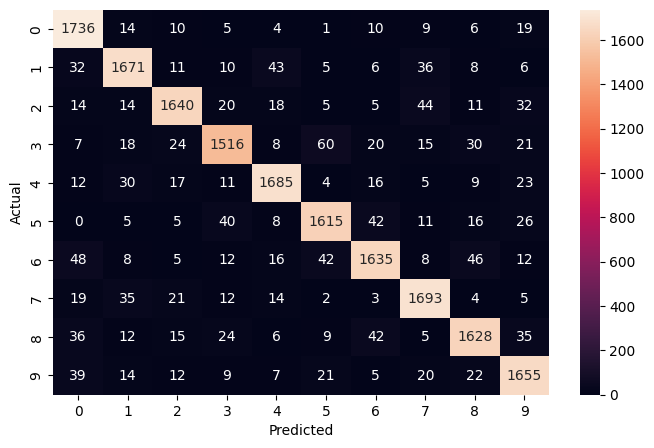

In [153]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:_________**

    1. The model is giving about 91% accuracy on the test data which is comparable to the accuracy of the validation data.
    2. The recall has a very high range (90-94)% which implies that the model is good at identifying most of the objects. Model is able to identify about 95% of image 0 but can only identify only ~89% of image 6.
    3. The image classes 2 and 4 have the highest precision, which means of all the images identified as 2 and 4, most of them are right.
    3. Here also lowest image classes 3 and 6 has the lowest recall which means the model needs improvements in order to distinguish between 3 and 6.
    4. Overall the model could distiguish individual digits well.
    5. Also, considering the overall accuracy and recall values, we can say that CNN works better than ANN when identifying digits in the images.
